In [117]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [118]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [119]:
sd = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1").rename(columns=lambda x: x.strip())
sd.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [120]:
sd.dtypes


iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
             ...   
amb1_3      float64
shar1_3     float64
attr7_3     float64
sinc7_3     float64
intel7_3    float64
fun7_3      float64
amb7_3      float64
shar7_3     float64
attr4_3     float64
sinc4_3     float64
intel4_3    float64
fun4_3      float64
amb4_3      float64
shar4_3     float64
attr2_3     float64
sinc2_3     float64
intel2_3    float64
fun2_3      float64
amb2_3      float64


In [121]:
# convert income to numeric values
sd['income'] = sd['income'].str.replace(',', '')

In [122]:
pd.to_numeric(sd['income'])

0       69487.0
1       69487.0
2       69487.0
3       69487.0
4       69487.0
5       69487.0
6       69487.0
7       69487.0
8       69487.0
9       69487.0
10      65929.0
11      65929.0
12      65929.0
13      65929.0
14      65929.0
15      65929.0
16      65929.0
17      65929.0
18      65929.0
19      65929.0
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
8348    55138.0
8349    55138.0
8350    55138.0
8351    55138.0
8352    55138.0
8353    55138.0
8354    55138.0
8355    55138.0
8356        NaN
8357        NaN
8358        NaN
8359        NaN
8360        NaN
8361        NaN
8362        NaN
8363        NaN
8364        NaN
8365        NaN
8366        NaN
8367        NaN
8368        NaN
8369        NaN
8370        NaN
8371        NaN
8372        NaN
8373        NaN
8374        NaN
8375        NaN
8376        NaN
8377        NaN
Name: income, Length: 83

In [7]:
male = sd[sd['gender']==1]
male.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
100,11,1.0,1,2,1,1,10,7,NaN,4,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
101,11,1.0,1,2,1,1,10,3,NaN,10,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
102,11,1.0,1,2,1,1,10,9,NaN,6,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
103,11,1.0,1,2,1,1,10,6,NaN,3,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
104,11,1.0,1,2,1,1,10,4,NaN,1,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN


In [8]:
female = sd[sd['gender']==0]
female.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


x = sd[sd['wave'].between(10,22)].loc[(:,'attr1_1':'shar2_1')&(:,'gender')]
y = sd[['gender']]
y.isnull().sum()

In [9]:
features =['iid','gender','match','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',\
           'attr2_1', 'sinc2_1','intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr4_1',\
           'sinc4_1','fun4_1', 'intel4_1', 'amb4_1','shar4_1']


In [10]:
wave10 = sd[sd['wave'].between(10,22)].loc[:, features]
wave10.describe()
wave10.head()

,iid,gender,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,...,intel2_1,fun2_1,amb2_1,shar2_1,attr4_1,sinc4_1,fun4_1,intel4_1,amb4_1,shar4_1
count,4970.000000,4970.00000,4970.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4910.000000,4932.000000,...,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4910.000000
mean,394.206036,0.50000,0.158954,23.959702,17.477488,20.111052,17.318562,9.724114,11.431802,33.021492,...,13.797648,18.293593,11.362733,11.204785,31.999797,12.347121,17.931062,14.455799,10.842660,12.323829
std,95.292699,0.50005,0.365670,13.385124,7.834010,7.284072,6.626999,5.688571,6.612484,17.053744,...,6.922435,7.479125,7.492686,6.598445,14.767137,7.114781,6.837787,6.675540,7.621974,6.331559
min,234.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.000000,0.00000,0.000000,15.000000,12.000000,16.000000,14.000000,5.000000,5.000000,20.000000,...,10.000000,15.000000,5.000000,5.000000,20.000000,10.000000,15.000000,10.000000,5.000000,10.000000
50%,386.000000,0.50000,0.000000,20.000000,20.000000,20.000000,18.000000,10.000000,10.000000,30.000000,...,12.000000,20.000000,10.000000,10.000000,30.000000,10.000000,20.000000,15.000000,10.000000,10.000000
75%,483.000000,1.00000,0.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,40.000000,...,20.000000,20.000000,15.000000,15.000000,40.000000,17.000000,20.000000,20.000000,15.000000,15.000000
max,552.000000,1.00000,1.000000,95.000000,60.000000,50.000000,50.000000,30.000000,30.000000,100.000000,...,40.000000,50.000000,50.000000,30.000000,95.000000,35.000000,45.000000,35.000000,50.000000,40.000000


,iid,gender,match,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,...,intel2_1,fun2_1,amb2_1,shar2_1,attr4_1,sinc4_1,fun4_1,intel4_1,amb4_1,shar4_1
3408,234,0,0,20.0,20.0,20.0,10.0,10.0,20.0,75.0,...,1.0,3.0,10.0,10.0,10.0,20.0,20.0,20.0,15.0,15.0
3409,234,0,0,20.0,20.0,20.0,10.0,10.0,20.0,75.0,...,1.0,3.0,10.0,10.0,10.0,20.0,20.0,20.0,15.0,15.0
3410,234,0,0,20.0,20.0,20.0,10.0,10.0,20.0,75.0,...,1.0,3.0,10.0,10.0,10.0,20.0,20.0,20.0,15.0,15.0
3411,234,0,0,20.0,20.0,20.0,10.0,10.0,20.0,75.0,...,1.0,3.0,10.0,10.0,10.0,20.0,20.0,20.0,15.0,15.0
3412,234,0,0,20.0,20.0,20.0,10.0,10.0,20.0,75.0,...,1.0,3.0,10.0,10.0,10.0,20.0,20.0,20.0,15.0,15.0


In [11]:
wave10=wave10.dropna(axis=0,how='any')
wave10.isnull().sum()

iid         0
gender      0
match       0
attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
attr4_1     0
sinc4_1     0
fun4_1      0
intel4_1    0
amb4_1      0
shar4_1     0
dtype: int64

In [12]:
df_X, y = wave10.drop(['match'], axis=1), wave10['match']

In [10]:
try1 = sd[['attr1_1', 'sinc1_1','intel1_1', 'fun1_1', 'amb1_1']].copy()
try1

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,15.0,20.0,20.0,15.0,15.0
1,15.0,20.0,20.0,15.0,15.0
2,15.0,20.0,20.0,15.0,15.0
3,15.0,20.0,20.0,15.0,15.0
4,15.0,20.0,20.0,15.0,15.0
5,15.0,20.0,20.0,15.0,15.0
6,15.0,20.0,20.0,15.0,15.0
7,15.0,20.0,20.0,15.0,15.0
8,15.0,20.0,20.0,15.0,15.0
9,15.0,20.0,20.0,15.0,15.0


In [14]:
sd[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']].iloc[0,:].sum()


85.0

In [15]:
len(sd[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']].columns)

5

In [16]:
sd[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']].iloc[0,0]

15.0

In [7]:
def scale10(question):
    for i in range(0, len(question)):
        total = question.iloc[i,:].sum()/100
        for j in range(0, len(question.columns)):
            question.iloc[i,j]=(question.iloc[i,j]/total)/10
    return question
             

notion of control of the other group (a/b testing)
top 3: clustering 
start small 
qausi 

In [18]:
try1.iloc[0,0]

15.0

In [19]:
import warnings
warnings.filterwarinigs

NameError: name 'warnings' is not defined

In [55]:
pd.to_numeric(sd['income'])

ValueError: Unable to parse string "69,487.00" at position 0

In [70]:

features =['gender','match','round','order','samerace','age','field_cd','race','imprace',\
          'imprelig','date','go_out','sports',\
          'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing',\
          'reading','tv','theater','movies','music','shopping','yoga',\
          'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',\
           'attr2_1', 'sinc2_1','intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1',\
           'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']

In [71]:
sd[features].corr()

,gender,match,round,order,samerace,age,field_cd,race,imprace,imprelig,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
gender,1.000000,-0.000530,0.020630,0.006685,-0.000966,0.070574,-0.080728,-0.018857,-0.113211,-0.199148,...,0.275027,0.299185,-0.046987,0.363349,-0.127549,-0.095813,-0.115562,-0.120355,0.077053,-0.030287
match,-0.000530,1.000000,-0.033257,-0.038731,0.013028,-0.035055,-0.024641,-0.013268,-0.049032,-0.026014,...,-0.014294,0.026303,-0.009985,-0.000028,-0.037709,0.036439,-0.001965,0.051066,0.004327,0.010592
round,0.020630,-0.033257,1.000000,0.399942,0.034067,0.007013,0.073147,-0.075542,0.067014,0.061455,...,0.041830,-0.018016,-0.053872,0.011768,-0.004931,-0.006992,0.028745,0.004185,0.060556,0.006661
order,0.006685,-0.038731,0.399942,1.000000,0.008640,0.002959,0.029480,-0.030199,0.026731,0.025282,...,0.016720,-0.007067,-0.021886,0.003783,-0.001059,-0.002594,0.011855,0.001646,0.024133,0.002952
samerace,-0.000966,0.013028,0.034067,0.008640,1.000000,0.007140,-0.024828,-0.269159,0.090517,0.071044,...,-0.054459,-0.013046,0.043271,-0.006505,-0.024217,0.035238,-0.022572,-0.019006,0.040273,-0.019232
age,0.070574,-0.035055,0.007013,0.002959,0.007140,1.000000,0.138069,-0.058010,-0.147194,-0.054876,...,0.014169,-0.009051,-0.030072,0.004812,-0.053225,0.068320,-0.031567,-0.069247,-0.003339,-0.061957
field_cd,-0.080728,-0.024641,0.073147,0.029480,-0.024828,0.138069,1.000000,0.026112,-0.034245,-0.074747,...,-0.000464,0.042275,-0.055930,0.035243,0.048708,0.048896,0.018004,-0.006479,-0.082070,0.031789
race,-0.018857,-0.013268,-0.075542,-0.030199,-0.269159,-0.058010,0.026112,1.000000,-0.119451,-0.072506,...,0.142902,0.061060,-0.049253,-0.091011,0.081942,-0.112724,0.082925,-0.026301,-0.053285,-0.036823
imprace,-0.113211,-0.049032,0.067014,0.026731,0.090517,-0.147194,-0.034245,-0.119451,1.000000,0.430284,...,-0.073118,-0.004714,0.001032,-0.033537,-0.007970,0.031697,0.052936,0.025015,0.071881,0.134238
imprelig,-0.199148,-0.026014,0.061455,0.025282,0.071044,-0.054876,-0.074747,-0.072506,0.430284,1.000000,...,-0.130718,-0.047948,-0.030494,-0.062344,0.057628,0.010926,0.110741,0.050536,0.084049,0.044988


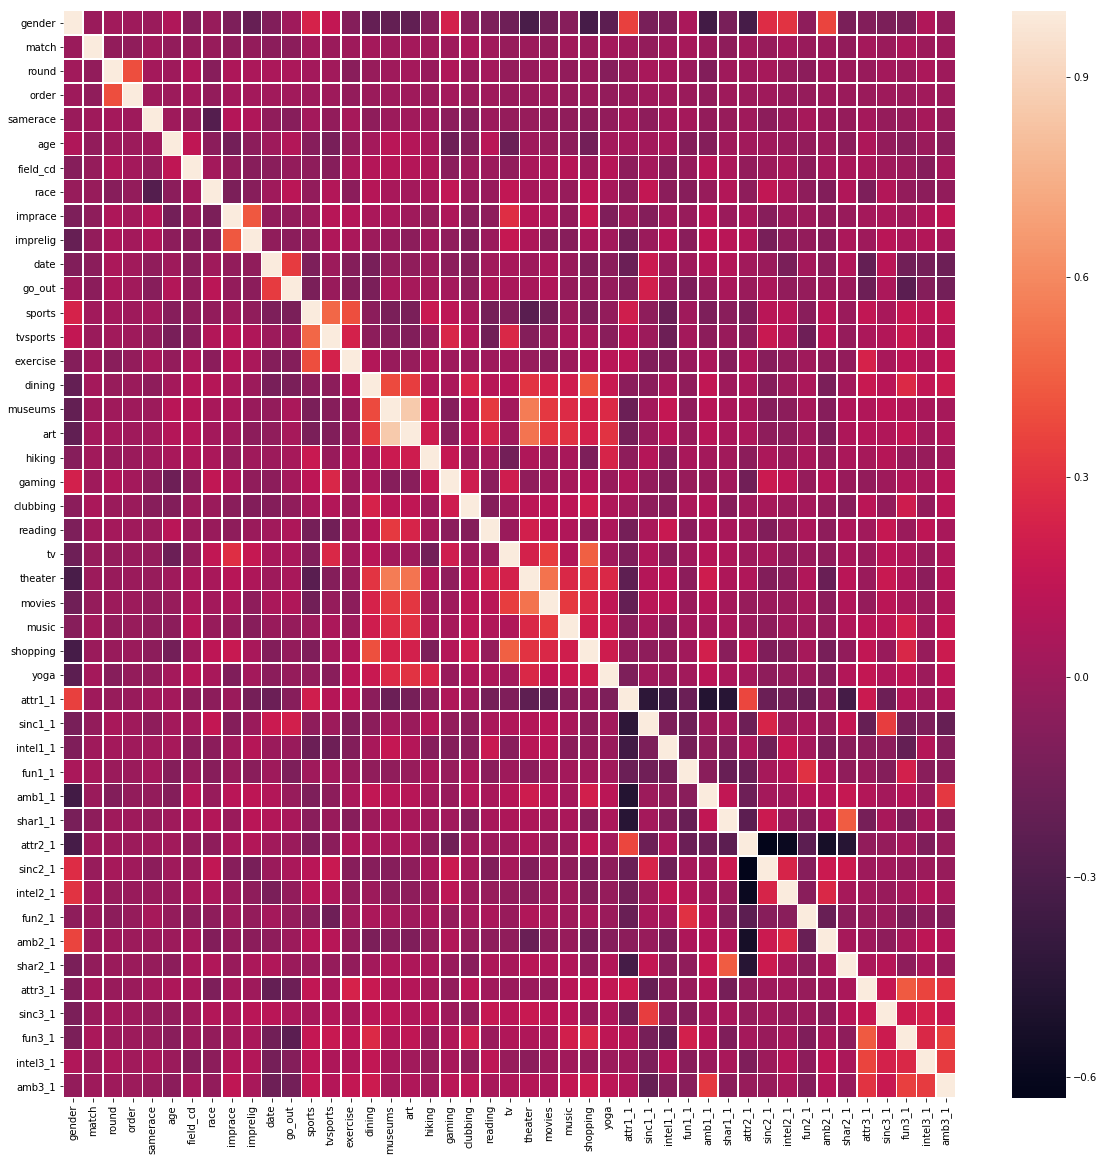

In [72]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[features].corr(),linewidths=.5, ax=ax)

In [131]:
#  'imprelig' 
# 'go_out'
# 'art', 'theater', 'shopping', 'sports','movies', 'shar2_1', 'dining', 'amb3_1'
# 'sinc2_1','amb2_1'
# attr1_1/attr2_1 is highly corr with several other attribution
keep =['gender','match','order','age','field_cd','race','imprace','income',\
       'date','exercise','museums','hiking','gaming','clubbing',\
        'reading','tv','music','yoga', 'sinc1_1', 'intel1_1',\
       'fun1_1', 'amb1_1', 'shar1_1','intel2_1', 'fun2_1','sinc3_1','fun3_1', 'intel3_1']

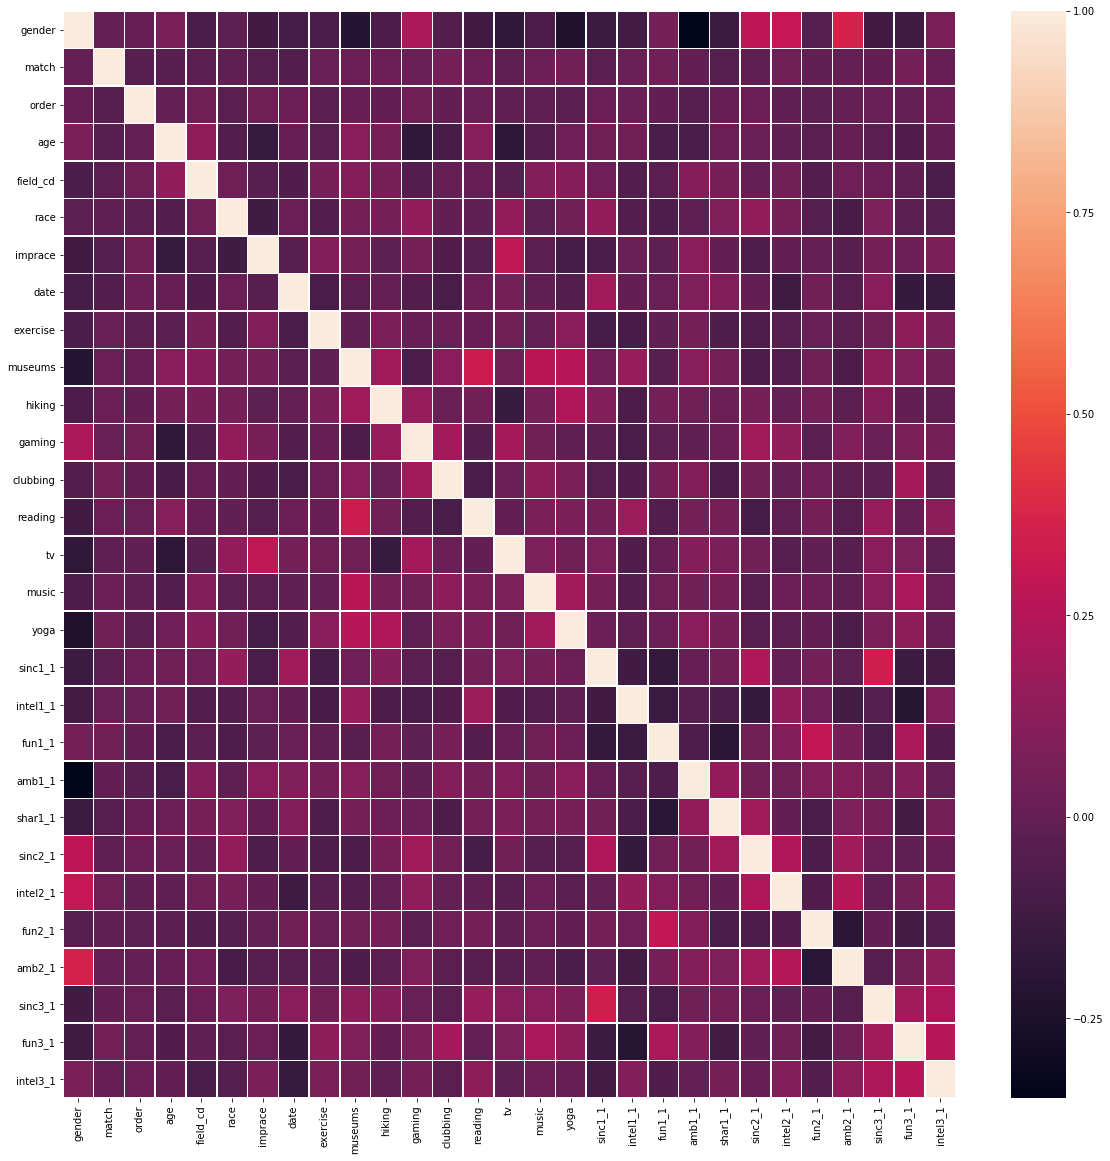

In [126]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[keep].corr(),linewidths=.5, ax=ax)

In [132]:
temp1 = sd[keep].apply(lambda x: x.fillna(x.median()), axis=1)

In [133]:
temp1.isnull().sum()

gender      0
match       0
order       0
age         0
field_cd    0
race        0
imprace     0
income      0
date        0
exercise    0
museums     0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
music       0
yoga        0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
intel2_1    0
fun2_1      0
sinc3_1     0
fun3_1      0
intel3_1    0
dtype: int64

In [134]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(temp1)
        sil = metrics.silhouette_score(temp1, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

KMeans(alg with k =2: 0.761
Birch(bran with k =2: 0.7553
Agglomerat with k =2: 0.7553
KMeans(alg with k =3: 0.7473
Birch(bran with k =3: 0.7404
Agglomerat with k =3: 0.7439
KMeans(alg with k =4: 0.7805
Birch(bran with k =4: 0.7656
Agglomerat with k =4: 0.7762
KMeans(alg with k =5: 0.7698
Birch(bran with k =5: 0.7577
Agglomerat with k =5: 0.7325
